# Biometry Lab 3 - Probility Distributions

September 10, 2019

## Section 1 - Probability Lab Exercises

In [79]:
#Q1 Simple Exercises
# a
# heads or tails
# b 
# There are two options, heads is one option. P(heads) = 1/2 = 0.5
# c
sample(iris$Sepal.Width,3,replace = T)
library("DAAG")
library("data.table")

[1] 3.3 3.1 3.2

In [80]:
# in the sample function call above, 3 is the sample size and
# replace = T is telling it to sample with replacement

In [81]:
# d
coin = c(0,1)

In [82]:
ss = c(1, 5, 10, 15, 20, 25, 30)

In [83]:
w_replace = NULL
for (i in ss) {
    w_replace = c(w_replace, sample(coin, i, replace = T))
}
print(w_replace)

  [1] 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0
 [38] 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1
 [75] 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1


In [84]:
sum(w_replace) / length(w_replace)

[1] 0.4245283

In [85]:
#Q2
# a
tapply(possum$skullw, possum$sex, mean)

f        m 
56.58837 57.09180

In [86]:
# b
cbind(mean = tapply(possum$totlngth, possum$sex, mean),
v = tapply(possum$totlngth, possum$sex, var),
l = tapply(possum$totlngth, possum$sex, length))

,mean,v,l
f,87.90698,17.49114,43
m,86.51148,18.83470,61


In [87]:
# Q3
suppressMessages(library("dplyr"))
suppressMessages(library("DAAG"))

In [88]:
filter(possum, Pop== 'Vic', totlngth<80)

case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
39,2,Vic,f,1,84.7,51.5,75,34.0,68.7,53.4,13.0,25.0,25
42,2,Vic,m,3,85.3,54.1,77,32.0,62.7,51.2,13.8,25.5,33
44,2,Vic,m,NA,85.1,51.5,76,35.5,70.3,52.6,14.4,23.0,27


In [89]:
possum[possum$Pop=='Vic' & possum$totlngth<80,]

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BB31,39,2,Vic,f,1,84.7,51.5,75,34.0,68.7,53.4,13.0,25.0,25
BB38,42,2,Vic,m,3,85.3,54.1,77,32.0,62.7,51.2,13.8,25.5,33
BB41,44,2,Vic,m,NA,85.1,51.5,76,35.5,70.3,52.6,14.4,23.0,27


In [90]:
# d
results <- possum %>%
     group_by(Pop, sex) %>%
     summarize(n=n(), sd=sd(totlngth), mean=mean(totlngth))
 results

Pop,sex,n,sd,mean
<fct>,<fct>,<int>,<dbl>,<dbl>
Vic,f,24,4.957793,88.33333
Vic,m,22,4.648290,86.52273
other,f,19,2.976025,87.36842
other,m,39,4.218814,86.50513



## Section 2 - Discrete Distributions

In [91]:
fc = read.csv('./fruit_count.csv')
fc

block,plant,fruits,diameter
<int>,<int>,<int>,<dbl>
4,1,2027,65.0
5,1,1879,78.5
6,1,2723,76.0
7,17,984,47.0
8,1,442,25.0
9,1,519,28.0
10,1,347,10.0
11,1,666,22.0
12,1,1882,40.0


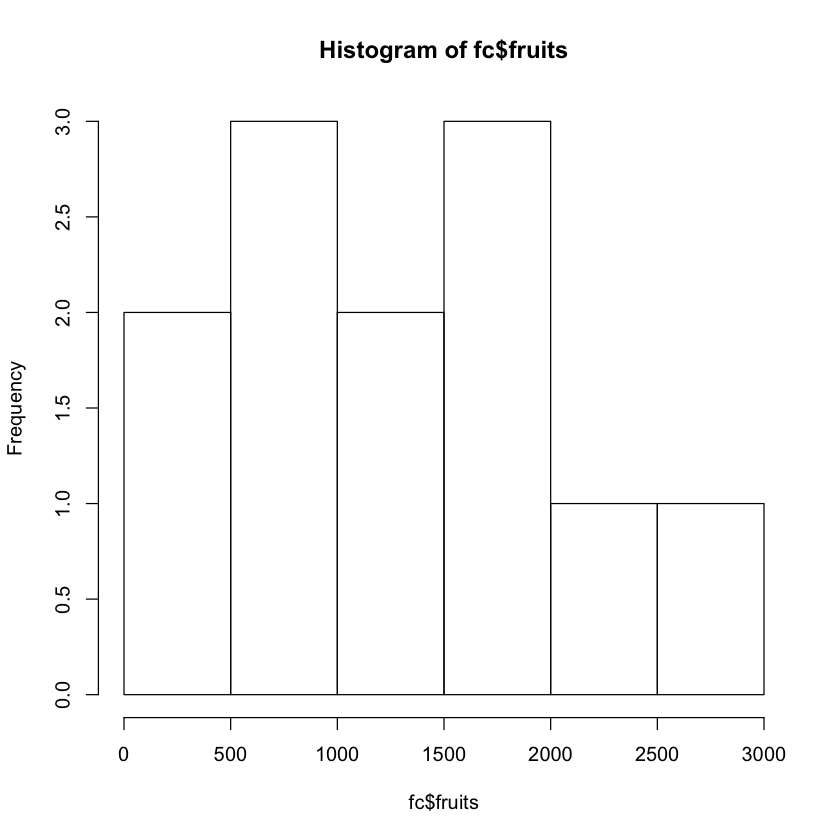

In [92]:
hist(fc$fruits)

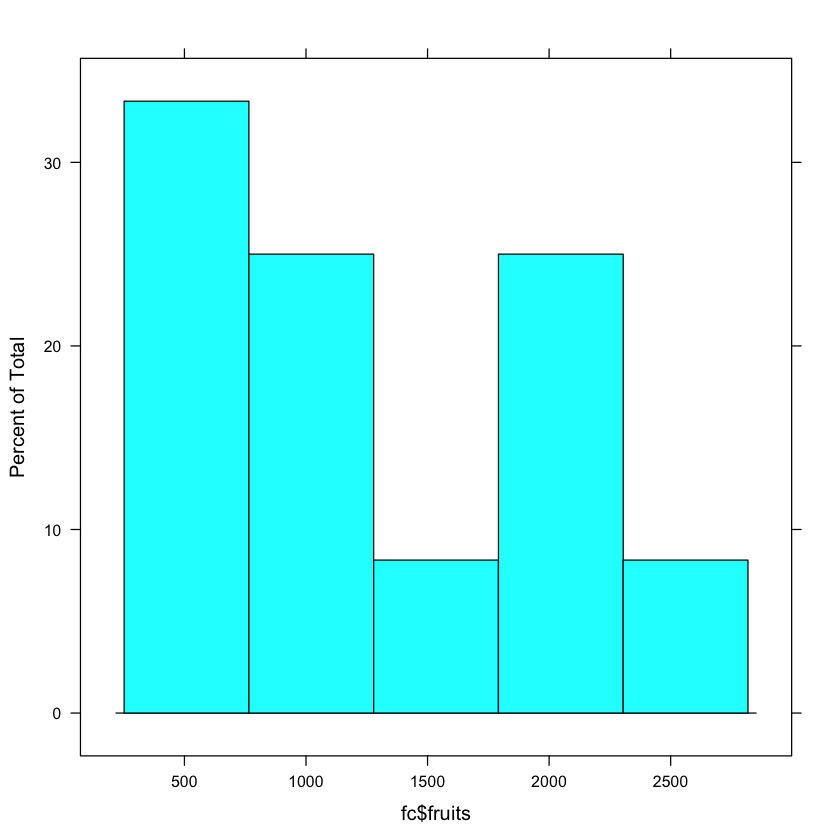

In [93]:
histogram(fc$fruits)

In [94]:
dbinom(c(0:10), 10, 0.25)

[1] 5.631351e-02 1.877117e-01 2.815676e-01 2.502823e-01 1.459980e-01
 [6] 5.839920e-02 1.622200e-02 3.089905e-03 3.862381e-04 2.861023e-05
[11] 9.536743e-07

In [95]:
num.males <- c(0,1,2,3,4,5,6,7,8,9,10,11,12)
frq.obs <- c(7,45,181,478,829,1112,1343,1033,670,286,104,24,3)
d = data.table(num.males, frq.obs)
d

num.males,frq.obs
<dbl>,<dbl>
0,7
1,45
2,181
3,478
4,829
5,1112
6,1343
7,1033
8,670


In [96]:
m = sum(num.males * frq.obs) / sum(frq.obs)
m

[1] 5.769419

In [97]:
dbinom(c(0:12), 12, 5.76941946034342/12) * sum(frq.obs) - frq.obs

[1]  -4.652727 -18.917541 -48.164297 -67.987437  25.246646 153.630307
 [7]  24.279355  52.210701 -41.944988 -27.524866 -32.196829 -11.911163
[13]  -2.067161